# W11,12 - November 1,8 - Scikit-learn: Supervised Learning

Scikit-learn is a third-party library (not in the Standard Libraray), included with the Anaconda Distribution. Hence, you don't need to install it in the default Anaconda environment (`base`).

Note: Scikit-learn is imported as `sklearn`.

**Why use Scikit-learn?**

Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities.

https://scikit-learn.org/stable/

https://scipy-lectures.org/packages/scikit-learn/

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# To suppress some warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Supervised learning

In Supervised Learning, we have a dataset consisting of both **features and labels**. The task is to construct an estimator which is able to predict the label of an object given the set of features. There are one or more unknown quantities, i.e. the targets, associated with the object which needs to be determined from other observed quantities, i.e., the features.

## Regression

Regression is a subset of supervised learning, where the label is a **continuous** quantity.

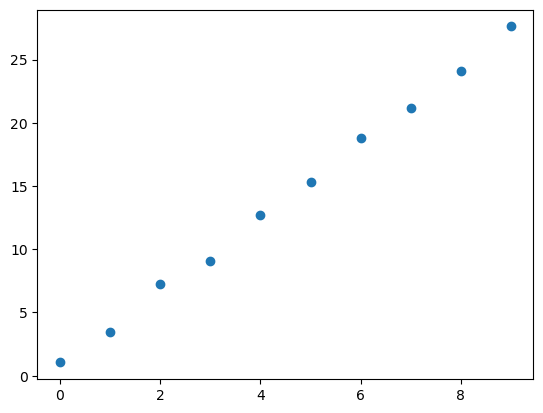

In [2]:
# Create data
x = np.arange(10)
y = 3*x + 0.5
noise = np.random.normal(scale=0.5, size=10)
y_data = y + noise

# Plot
plt.plot(x, y_data, "o");

To perform regression, the x values (given by the matrix $A$ in $AX=B$) needs to be a 2D array.

In [3]:
x_data = x[:, np.newaxis]
x_data

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

Let's create a `LinearRegression` estimator with default parameters

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_data, y_data)

LinearRegression()

All the estimated parameters are attributes of the estimator object ending by an underscore:

In [5]:
model.coef_

array([2.94097493])

In [6]:
model.intercept_

0.8296489816188242

In [7]:
model.score(x_data, y_data)

0.9984233479342965

To predict the y value at different points

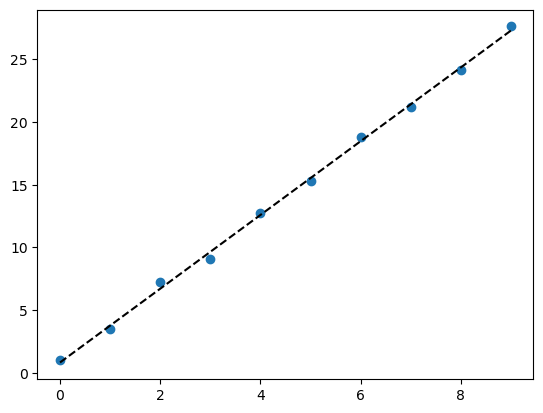

In [8]:
# Create denser array
x_reg = np.linspace(0, 9)

# Predict
y_reg = model.predict(x_reg[:, np.newaxis])

plt.plot(x, y_data, "o")
plt.plot(x_reg, y_reg, "--k");

### Advanced regression

In [9]:
# Fetch data as a pandas DataFrame
from sklearn import datasets

housing = datasets.fetch_california_housing(as_frame=True)
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [10]:
housing.frame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Let's visualize our target

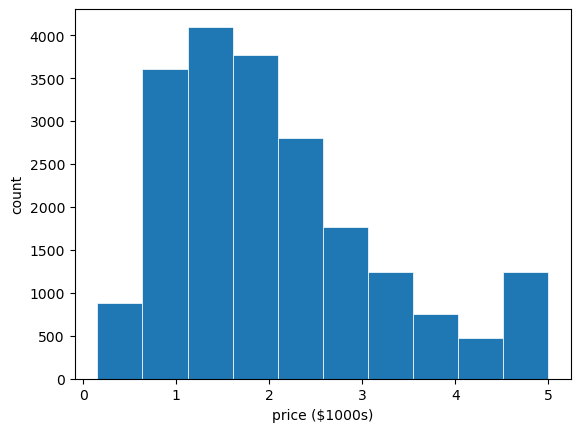

In [11]:
plt.hist(housing.target, linewidth=0.5, edgecolor="white");
plt.xlabel('price ($1000s)');
plt.ylabel('count');

and how each predictor affects our target

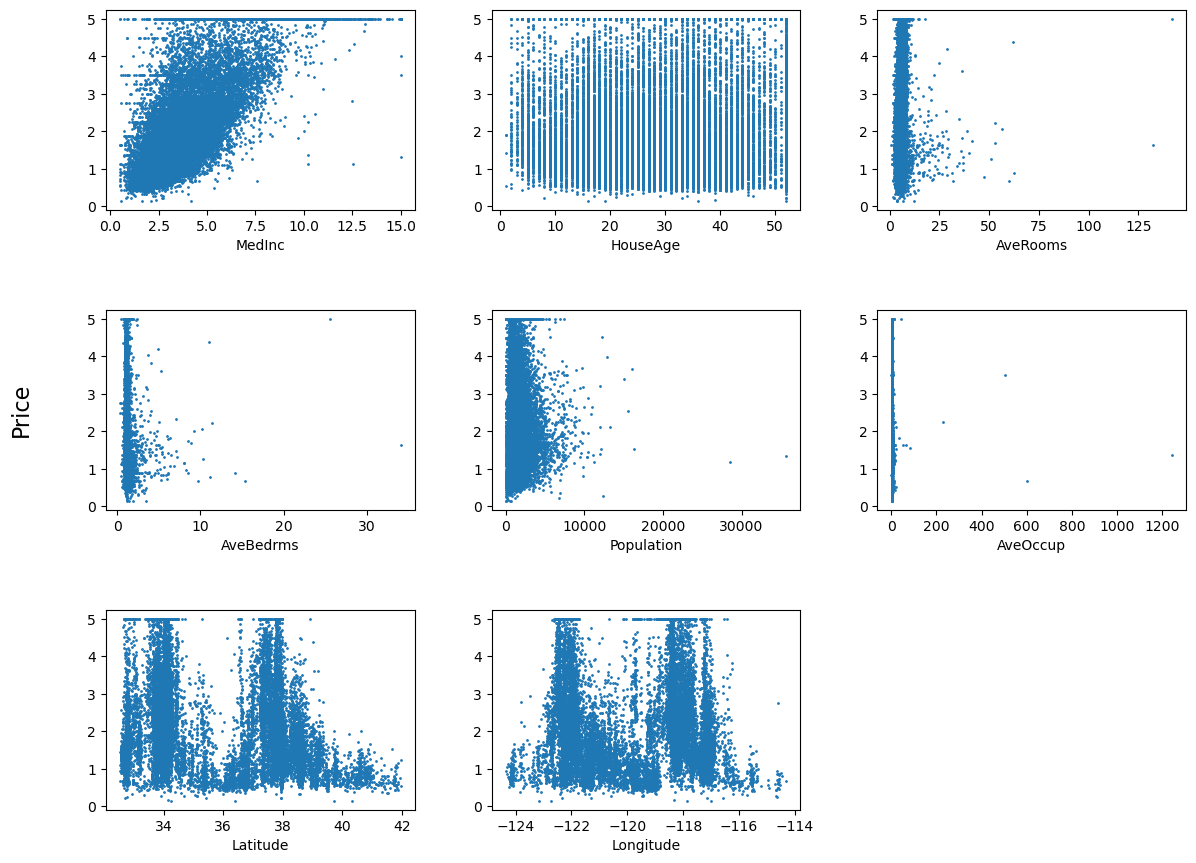

In [12]:
# Plot
fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0.1, right=1, bottom=0, top=1, hspace=0.5, wspace=0.25)
images_per_axis = 3
for idx, feature_name in enumerate(housing.feature_names):
    ax = fig.add_subplot(images_per_axis, images_per_axis, idx + 1)
    ax.scatter(housing.data[feature_name], housing.target, s=1)
    ax.set_xlabel(feature_name)
fig.supylabel('Price', size=16);

Before we begin, I'm going to define a function to help visualize the data.

In [13]:
def kde_plot(xx, yy, title):
    # Calculate the point density
    kde = stats.gaussian_kde([xx,yy])
    zz = kde([xx,yy])

    # Sort the points by density, so that the densest points are plotted last
    idx = zz.argsort()
    xx, yy, zz = xx[idx], yy[idx], zz[idx]
    
    # Plot Limits
    lims = [0, 6]
    
    fig, ax = plt.subplots()
    ax.scatter(xx, yy, c=zz, s=5)
    ax.plot(lims, lims, "k")  # 45 degree line
    ax.set_xlabel("Expected")
    ax.set_ylabel("Predicted")
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.set_title(title)

    return fig

Let's start with a simple **linear regression**:

R2 = 0.6072
RMS: 0.7292


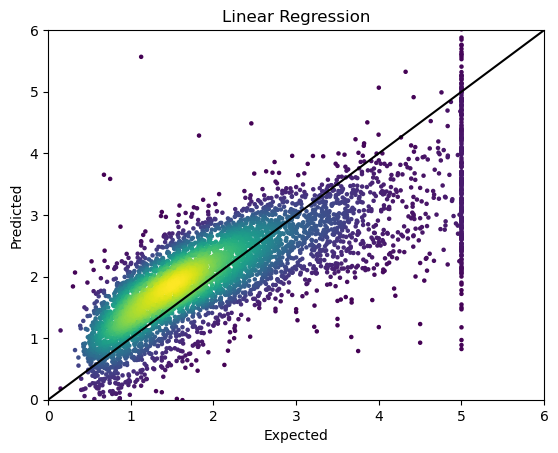

In [14]:
# Split the data into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target)

# Linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
predicted = lr.predict(X_test)
expected = y_test

# Plot
xx=expected.to_numpy()
yy=predicted
fig = kde_plot(xx, yy, "Linear Regression")

# Print 
print(f"R2 = {lr.score(X_train, y_train):.4f}")
print(f"RMS: {np.sqrt(np.mean((predicted - expected) ** 2)):.4f}")

Using a different **Random Forrest** regressor

R2 = 0.9722
RMS: 0.5146


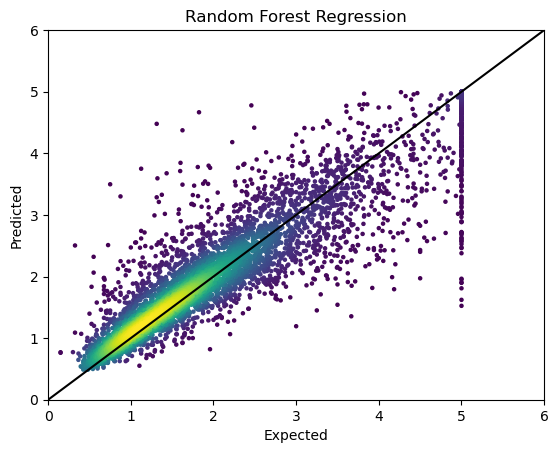

In [15]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=50, random_state=1)
rf.fit(X_train, y_train)
predicted = rf.predict(X_test)
expected = y_test

# Plot
xx=expected.to_numpy()
yy=predicted
fig = kde_plot(xx, yy, "Random Forest Regression")

# Print
print(f"R2 = {rf.score(X_train, y_train):.4f}")
print(f"RMS: {np.sqrt(np.mean((predicted - expected) ** 2)):.4f}")

We can also visualize the distribution of our errors

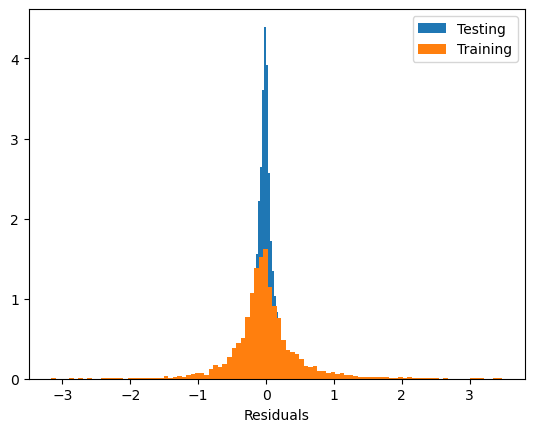

In [16]:
data_train = y_train - rf.predict(X_train)
data_test = y_test - rf.predict(X_test)

plt.hist(data_train, bins=100, label="Testing", density=True)
plt.hist(data_test, bins=100, label="Training", density=True)
plt.xlabel("Residuals")
plt.legend();

and plot the importance of the features we have used

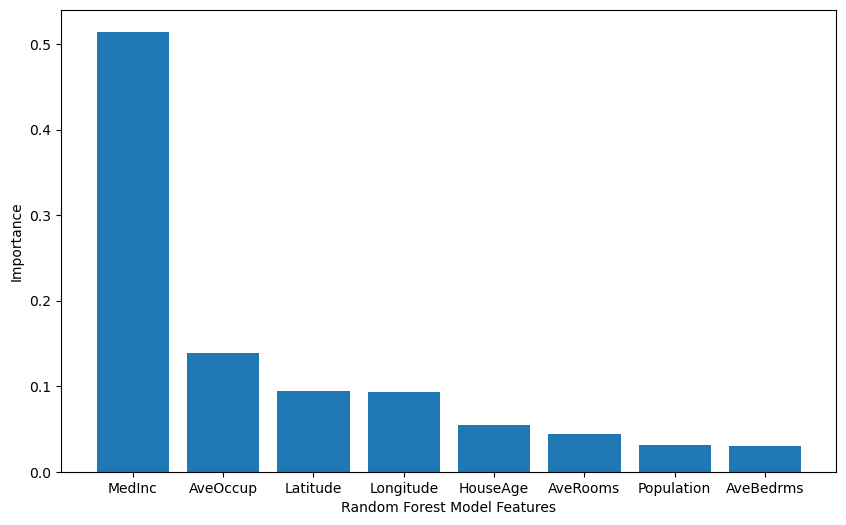

In [17]:
importances = rf.feature_importances_
included = housing.data.columns.values
indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x=included[indices], height=importances[indices])
ax.set_xlabel("Random Forest Model Features")
ax.set_ylabel("Importance");

## Classification

Classification is a subset of supervised learning, where the label is **discrete**.

In [18]:
from sklearn import neighbors, datasets
iris = datasets.load_iris()

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

The data is a 2D `numpy` array:

In [19]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Each row is an observation, and each column corresponds to the following features

In [20]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

The target is the "class" (in this case, species) of each observation, and is coded as a `numpy` array.

In [21]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

where 0, 1, 2 correspond to the following names

In [22]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Plotting two of the features

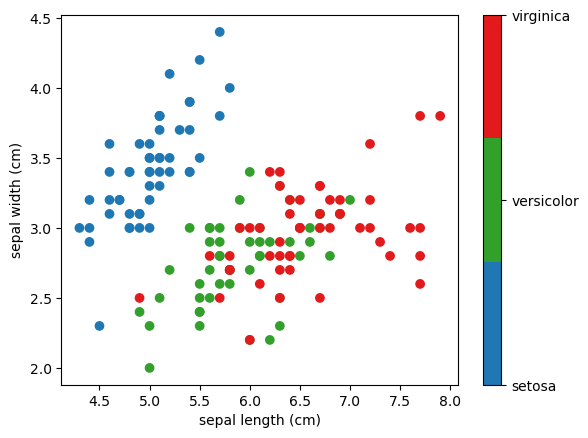

In [23]:
# Create color maps from alternate colors in the "Paired" colormap
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap([plt.cm.Paired(i) for i in range(0,6,2)])
cmap_bold = ListedColormap([plt.cm.Paired(i) for i in range(1,6,2)])

# Scatter plot
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target, cmap=cmap_bold)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

# Creating a color bar
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.colorbar(ticks=[0, 1, 2], format=formatter);

**K nearest neighbors (kNN)** is one of the simplest learning strategies. For every new, unknown observation, we look up which observations in our reference database have the closest features and assign the predominant *class*.

In [24]:
# kNN with a single nearest neighbor
from sklearn.neighbors import KNeighborsClassifier

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(iris.data, iris.target)

KNeighborsClassifier(n_neighbors=1)

To predict the species of iris that has 5 cm x 3 cm sepal and 3 cm x 1 cm petal:

In [25]:
prediction = knn.predict([[5, 3, 3, 1]])
print(iris.target_names[prediction])

['versicolor']


To visualize, let's plot the decision boundary

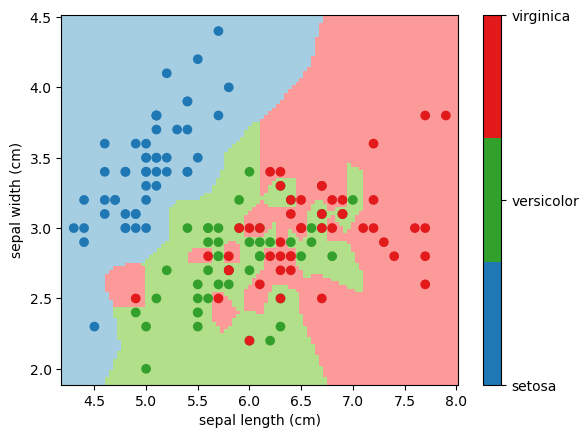

In [26]:
# We only take the first two features, for visualization purposes
X = iris.data[:, :2]
y = iris.target
knn_1 = neighbors.KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X, y)

# Create plot grid
x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Decision boundary
Z_1 = knn_1.predict(np.c_[xx.ravel(), yy.ravel()])
Z_1 = Z_1.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z_1, cmap=cmap_light)

# Training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

# Creating a color bar
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.colorbar(ticks=[0, 1, 2], format=formatter);

Re-doing the analysis with 3 neighbors

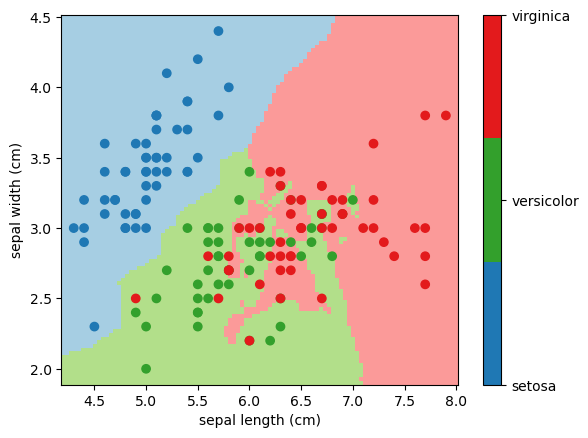

In [27]:
knn_3 = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X, y)

# Decision boundary
Z_3 = knn_3.predict(np.c_[xx.ravel(), yy.ravel()])
Z_3 = Z_3.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z_3, cmap=cmap_light)

# Training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

# Creating a color bar
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.colorbar(ticks=[0, 1, 2], format=formatter);

## Performance metrics

In [28]:
# Handwritten digits dataset
digits = datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

The data is a 2D `numpy` array:

In [29]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

Each row is an observation, and each column corresponds to the following features

The target is the "class" (in this case, the digit) for each observation, and is coded as a `numpy` array.

In [30]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

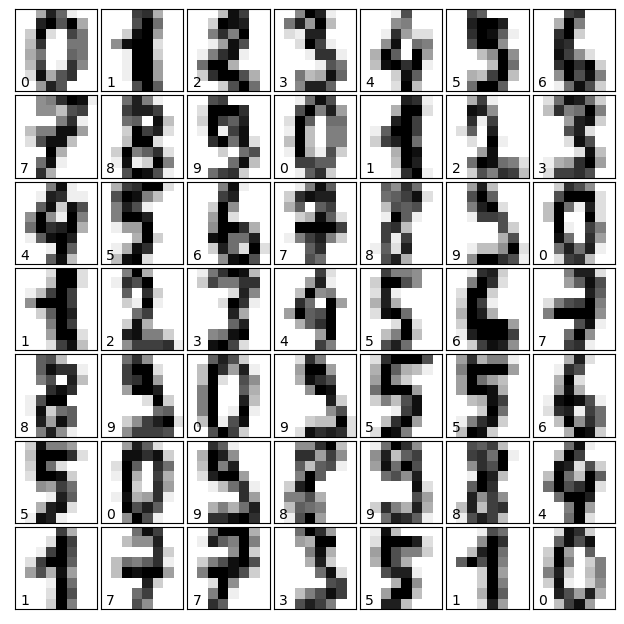

In [31]:
# Plot
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
images_per_axis = 7
num_images = images_per_axis**2
for idx, (image, target) in enumerate(zip(digits.images[:num_images], digits.target[:num_images])):
    ax = fig.add_subplot(images_per_axis, images_per_axis, idx + 1, xticks=[], yticks=[])
    ax.imshow(image, cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(target))  # label the image with the target value

Let's perform the simple kNN analysis

In [32]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(digits.data, digits.target)

# Prediction Score
y_pred = clf.predict(digits.data)
matches = (y_pred == digits.target)
print(f"Accuracy: {100*matches.sum() / len(matches)} %")

Accuracy: 100.0 %


Great news, right! We have a perfect classifier!

NO! This is misleading because the classifier essentially “memorizes” all the samples it has already seen. This is true for regression as well.

To really test how well an algorithm is at estimating the targets, we need to test it on samples it hasn’t yet seen.

### Using a validation set

We have to define two different sets:
- a training set `X_train`, `y_train` which is used for learning the parameters of a predictive model
- a testing set `X_test`, `y_test` which is used for evaluating the fitted predictive model

In [36]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(digits.data,
                                                                    digits.target,
                                                                    test_size=0.8)  # 80% of the data goes to the test set
clf.fit(X_train, y_train)

# Prediction Score
y_pred = clf.predict(X_test)
matches = (y_pred == y_test)
print(f"Accuracy: {100*matches.sum() / len(matches)} %")

Accuracy: 96.73157162726008 %


While comparing the number of matches is one way of judging the performance of a classifier, there are several more sophisticated metrics available in the `sklearn.metrics submodule`.

In [37]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       0.89      0.99      0.93       149
           2       0.99      0.95      0.97       135
           3       0.98      0.97      0.97       146
           4       0.99      0.99      0.99       147
           5       0.97      0.96      0.96       148
           6       0.99      0.99      0.99       152
           7       1.00      0.99      1.00       134
           8       0.93      0.89      0.91       141
           9       0.96      0.95      0.96       141

    accuracy                           0.97      1438
   macro avg       0.97      0.97      0.97      1438
weighted avg       0.97      0.97      0.97      1438



A confusion matrix is a good option to visualize which labels are being interchanged in the classification errors:

In [38]:
print(metrics.confusion_matrix(y_test, y_pred))

[[145   0   0   0   0   0   0   0   0   0]
 [  0 147   0   0   0   1   1   0   0   0]
 [  0   1 128   0   0   0   0   0   6   0]
 [  0   0   0 141   0   2   0   0   2   1]
 [  0   2   0   0 145   0   0   0   0   0]
 [  0   1   0   0   1 142   1   0   0   3]
 [  0   1   0   0   0   0 151   0   0   0]
 [  0   0   0   0   0   0   0 133   0   1]
 [  0  13   1   2   0   0   0   0 125   0]
 [  0   1   0   1   1   2   0   0   2 134]]


### Cross-validation

The accuracy of the model will depend on the way the data is split into the train and test sets. To reduce this bias, we repetively split the data in pairs of train and test sets.

K-fold is a very common cross-validation strategy, which divides all the samples in  $k$ groups of samples, called 'folds', of equal sizes. The prediction function is learned using $k-1$ folds, and the fold left out is used for test.

There are others: https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators

In [39]:
# 5 folds
kf = model_selection.KFold(n_splits=5)

clf = KNeighborsClassifier()
model_selection.cross_val_score(clf, digits.data, digits.target, cv=5)  # 5 folds

array([0.94722222, 0.95555556, 0.96657382, 0.98050139, 0.9637883 ])

### Hyperparameter optimization with cross-validation

Many models have hyper-parameters, i.e., parameters that define the model behavior. 

For example, some linear models are regularized:
- Ridge Regression uses L2 regularlization
- Lasso Regression uses L1 regularization

The selection of their regularization hyper-parameters is important as it affects the model performance.

In [40]:
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [41]:
# Ridge and Lasso regression
from sklearn.linear_model import Ridge, Lasso

# Using default parameters
for Model in [Ridge, Lasso]:
    model = Model()
    print(f"{Model.__name__}: {model_selection.cross_val_score(model, diabetes.data, diabetes.target).mean()}")

Ridge: 0.41017583365872856
Lasso: 0.3375597834274946


With the default parameters, it looks like Ridge regression performs better.

However, both of these models have a regularization parameter `alpha`, which sets the strength of the regularization. Let's see how it affects the models' performance.

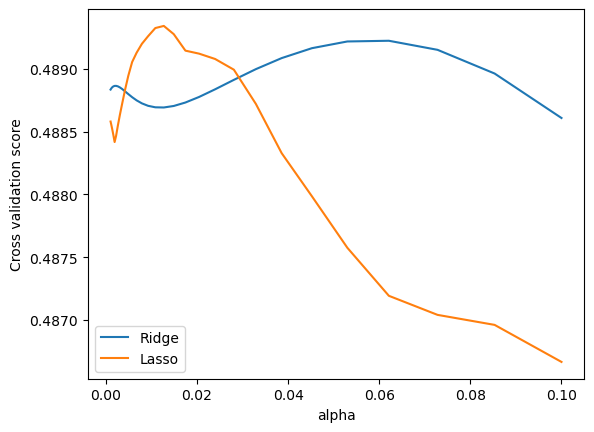

In [42]:
# Range of alphas (in log space)
alphas = np.logspace(-3, -1, 30)

for Model in [Ridge, Lasso]:
    scores = [model_selection.cross_val_score(Model(alpha), diabetes.data, diabetes.target, cv=3).mean()
              for alpha in alphas]
    plt.plot(alphas, scores, label=Model.__name__)

plt.xlabel("alpha")
plt.ylabel("Cross validation score")
plt.legend(loc="lower left");

For a package that is based on fitting and optimization, surely the optimization of hyper-parameters can also be automated! `sklearn` provides an automated way to perform a grid search.

In [43]:
from sklearn.model_selection import GridSearchCV

for Model in [Ridge, Lasso]:
    gscv = GridSearchCV(Model(), dict(alpha=alphas), cv=3).fit(diabetes.data, diabetes.target)
    print(f"{Model.__name__}: {gscv.best_params_}")

Ridge: {'alpha': 0.06210169418915616}
Lasso: {'alpha': 0.01268961003167922}


In fact, a cross-validated version of the particular model is conveniently included in `sklearn`.

In [44]:
# Cross-validated versions
from sklearn.linear_model import RidgeCV, LassoCV

for Model in [RidgeCV, LassoCV]:
    model = Model(alphas=alphas, cv=3).fit(diabetes.data, diabetes.target)
    print(f"{Model.__name__}: {model.alpha_}")

RidgeCV: 0.06210169418915616
LassoCV: 0.01268961003167922


So now, how do we measure and compare the "optimum" performance of these estimators? We have used the training data to set the hyperparameters, so shouldn't be testing on it.

Instead, we can run `model_selection.cross_val_score()` on our CV objects. As there are now 2 cross-validation loops going on, this is called **nested cross validation**.

In [45]:
for Model in [RidgeCV, LassoCV]:
    scores = model_selection.cross_val_score(Model(alphas=alphas, cv=3), diabetes.data, diabetes.target, cv=3)
    print(f"{Model.__name__}: {np.mean(scores)}")

RidgeCV: 0.4891614245496554
LassoCV: 0.4854913966864774


Now they both perform similarly. However, setting the optimal hyper-parameter is harder for Lasso Regression, as can be seen in the graph above.